In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
dataset = pd.read_csv("C:/Users/souro/Downloads/Handwritten-Digit-Classification-using-KNN-master/train_data.csv")

In [3]:
dataset.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


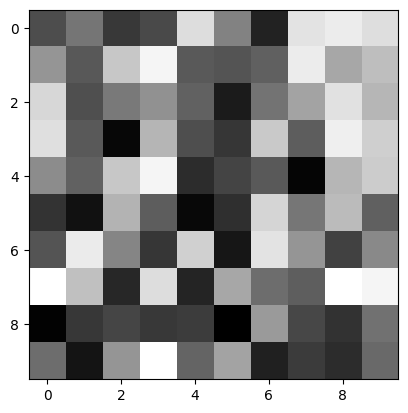

In [4]:
# Plotting images
a = np.random.random((10,10))
plt.figure()
plt.imshow(a, cmap='gray')
plt.show()

In [5]:
data = dataset.values[:5000]
data.shape

(5000, 785)

In [6]:
X, y = data[:,1:], data[:, 0]

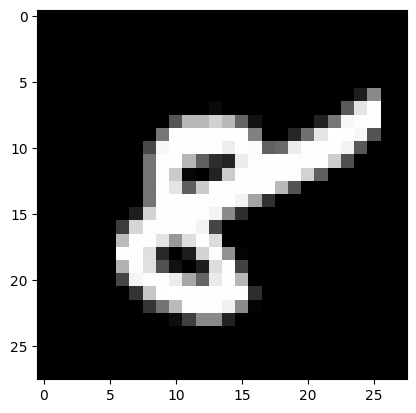

In [20]:
# Plotting digit
im = X[4997].reshape((28,28))
plt.figure()
plt.imshow(im, cmap='gray')
plt.show()

In [25]:
split = int(X.shape[0] * 0.85)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(4250, 784) (4250,)
(750, 784) (750,)
[1 0 1 ... 1 8 5]
[6 0 6 3 7 3 4 4 6 7 1 3 6 1 5 1 0 3 5 6 0 4 6 3 3 9 2 3 9 3 9 3 4 2 6 3 4
 6 4 2 7 9 7 5 1 9 6 4 0 6 0 3 0 9 9 5 1 1 7 2 1 6 2 3 0 9 1 6 5 9 5 9 2 1
 2 2 2 3 1 2 2 6 8 9 4 9 9 4 4 7 2 3 3 6 8 1 2 3 6 5 6 7 8 8 4 8 2 6 8 0 1
 3 6 7 5 1 6 1 6 1 3 0 9 0 9 1 3 0 2 1 2 4 3 6 2 5 5 0 2 4 0 2 3 3 1 1 0 4
 7 4 0 4 1 1 8 3 8 5 7 7 4 4 3 6 6 5 4 9 2 5 8 6 5 1 5 7 3 9 5 7 8 8 0 7 0
 1 6 8 9 1 1 7 9 8 7 9 3 7 3 9 3 2 1 1 2 7 3 9 1 0 8 2 3 4 0 6 7 9 4 7 0 9
 2 5 3 0 4 3 6 3 8 6 5 8 6 1 6 3 3 2 8 2 0 0 0 2 4 3 2 4 5 3 9 8 7 4 5 7 0
 1 1 3 3 9 6 5 6 4 4 4 6 3 0 1 5 8 2 0 0 1 8 1 7 4 7 4 3 2 1 2 5 2 8 5 7 5
 0 5 4 2 4 0 9 1 5 3 1 7 7 2 0 7 5 9 0 1 9 9 7 2 3 6 9 0 1 2 7 1 9 8 5 7 7
 5 3 8 2 7 8 1 7 7 7 6 7 6 5 2 9 4 5 2 8 7 2 9 6 5 0 4 2 6 8 2 1 9 2 0 2 3
 6 0 2 4 0 5 8 2 4 2 1 5 8 7 9 2 9 2 3 5 7 2 1 3 6 8 1 5 7 8 0 0 4 3 0 6 9
 8 8 9 4 9 3 8 1 7 3 9 9 5 2 8 9 6 4 1 4 2 9 1 9 8 5 2 7 1 8 1 3 5 8 8 6 3
 6 5 5 1 8 9 4 9 9 0 2 2 3 6 8 1 2 4 2 9 3 5

In [27]:
def knn(X_train, y_train, test_point, k=7):
    
    distances = [] # Contains list of tuples (distance, label
    
    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]
    
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [10]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [28]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k=7):
    
    predictions = []
    
    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)
    
    predictions = np.array(predictions)
    
    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [30]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=7)

0.932

In [13]:

test_df = pd.read_csv("C:/Users/souro/Downloads/Handwritten-Digit-Classification-using-KNN-master/test_data.csv")


In [14]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
test_data = test_df.values
test_images = test_data[20:50]
test_images.shape

(30, 784)

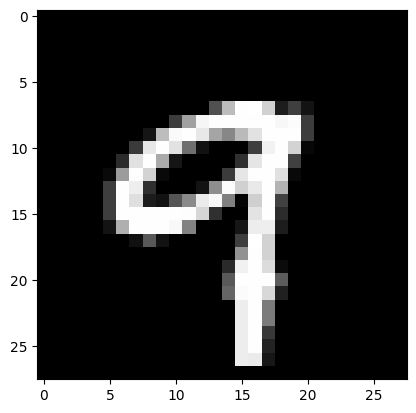

Label: 9.0


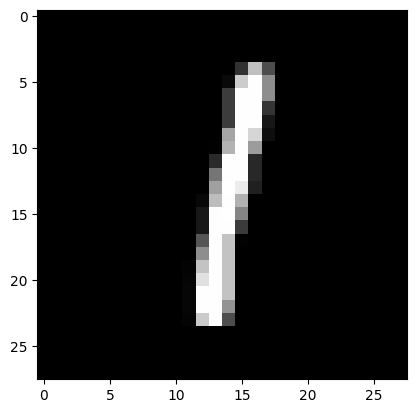

Label: 1.0


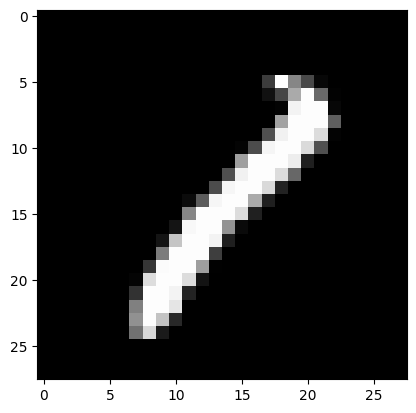

Label: 1.0


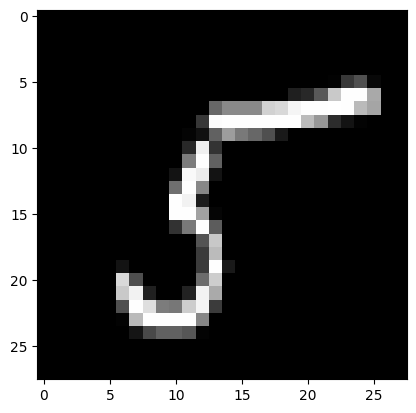

Label: 5.0


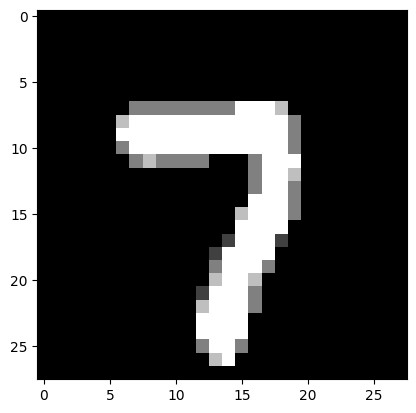

Label: 7.0


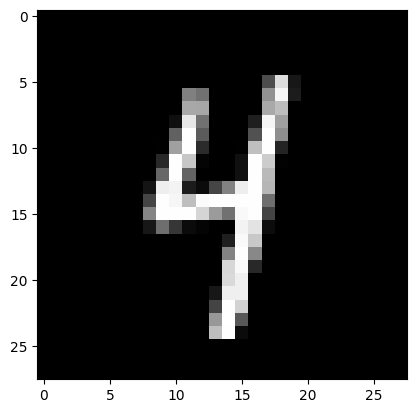

Label: 4.0


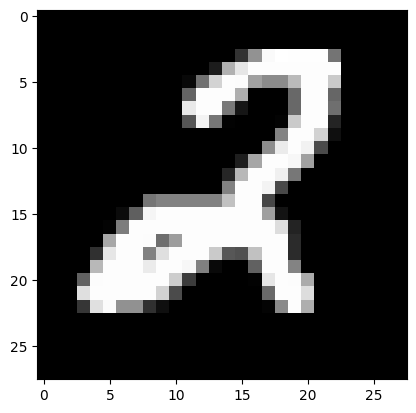

Label: 2.0


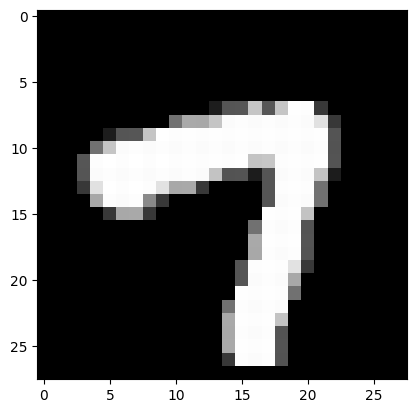

Label: 7.0


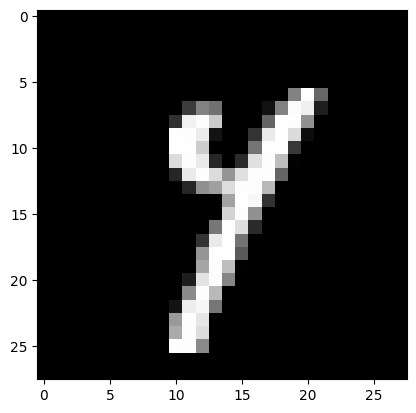

Label: 7.0


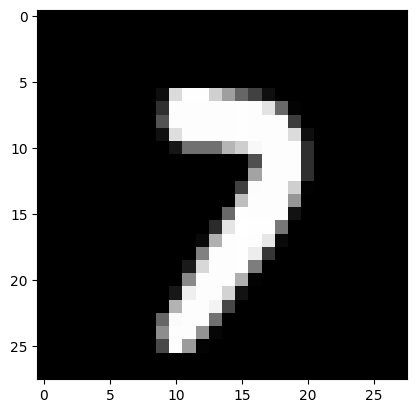

Label: 7.0


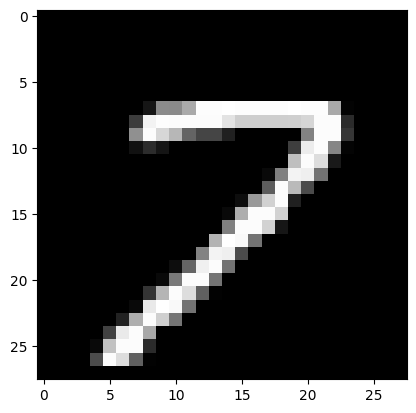

Label: 7.0


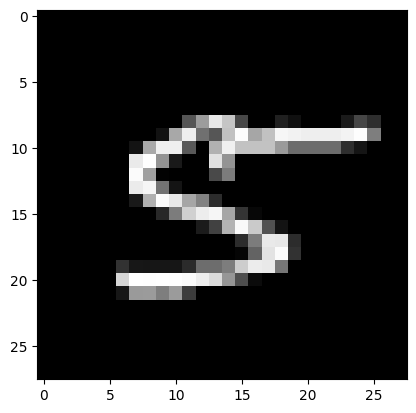

Label: 5.0


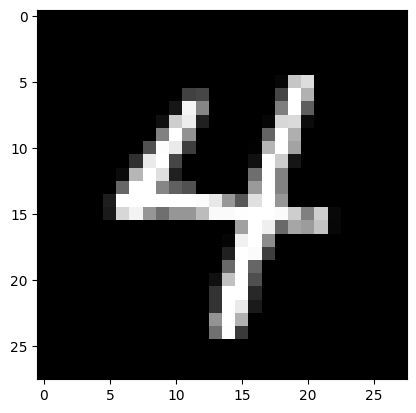

Label: 4.0


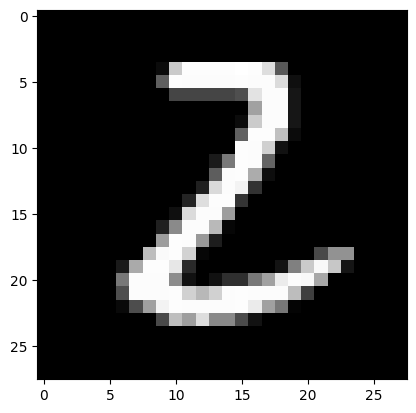

Label: 2.0


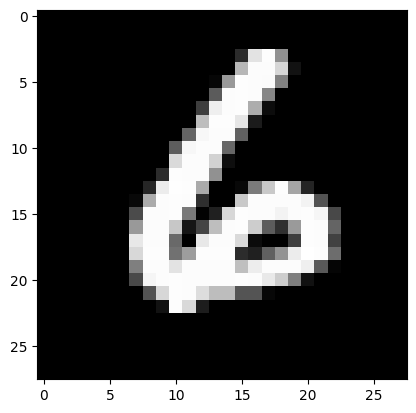

Label: 6.0


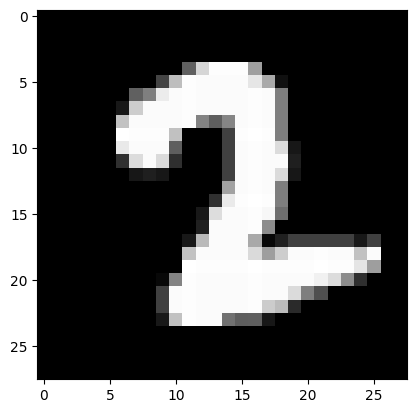

Label: 2.0


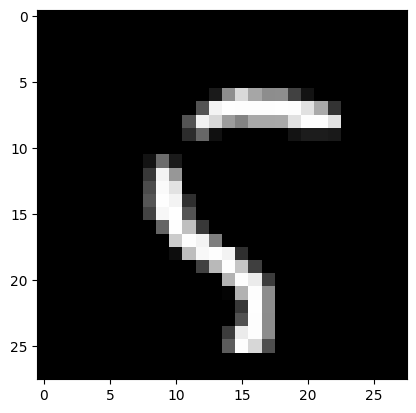

Label: 5.0


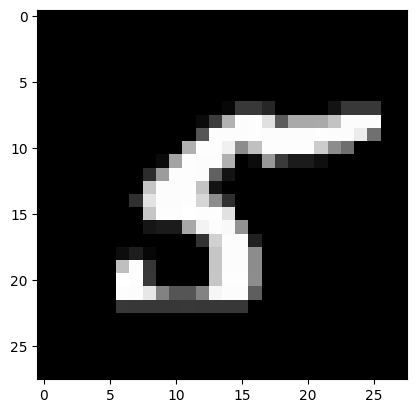

Label: 5.0


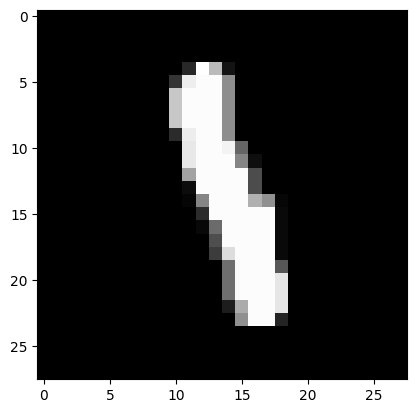

Label: 1.0


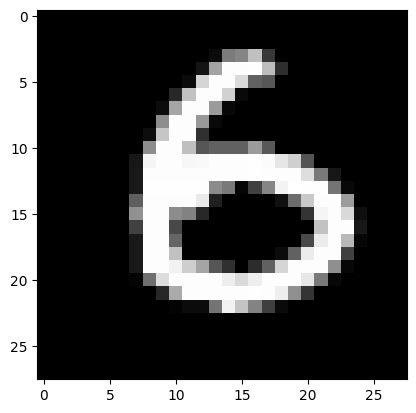

Label: 6.0


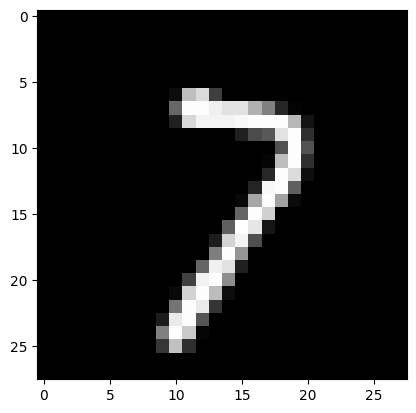

Label: 7.0


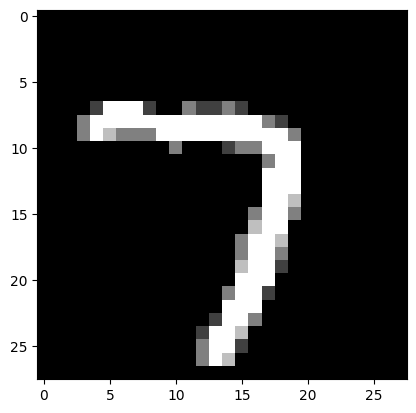

Label: 7.0


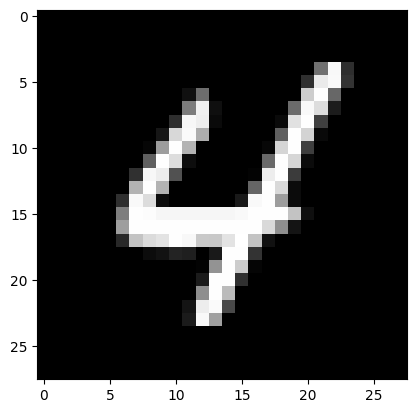

Label: 4.0


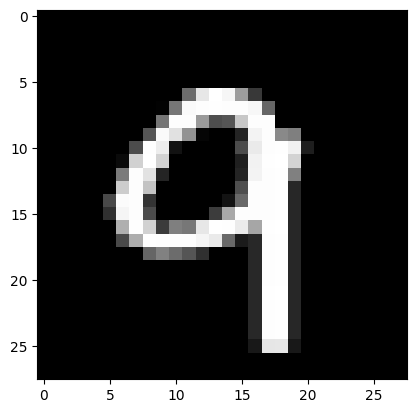

Label: 9.0


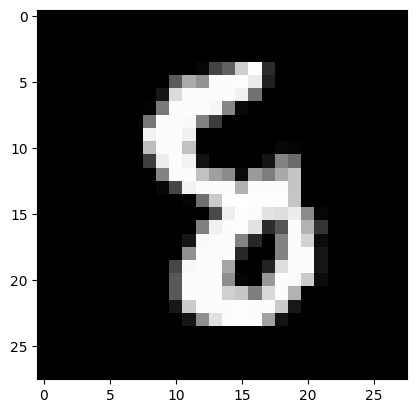

Label: 8.0


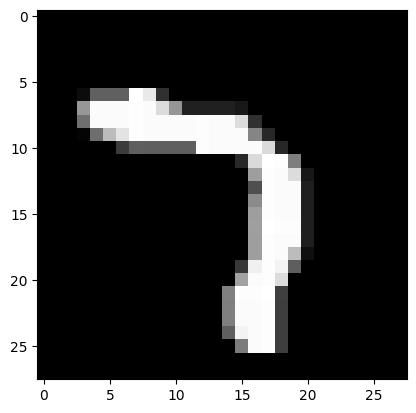

Label: 7.0


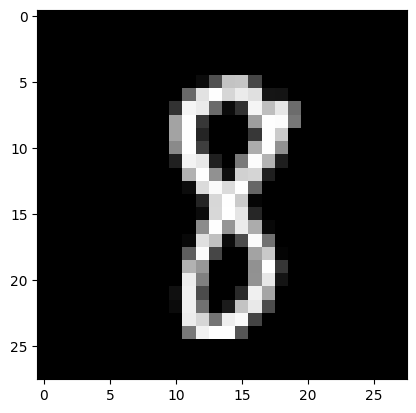

Label: 8.0


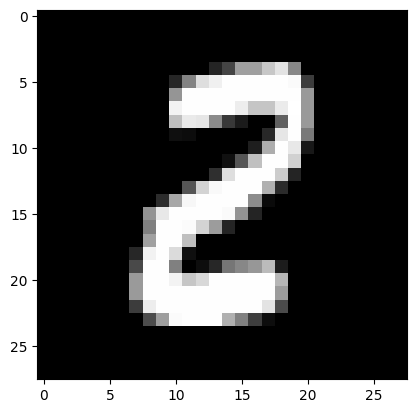

Label: 3.0


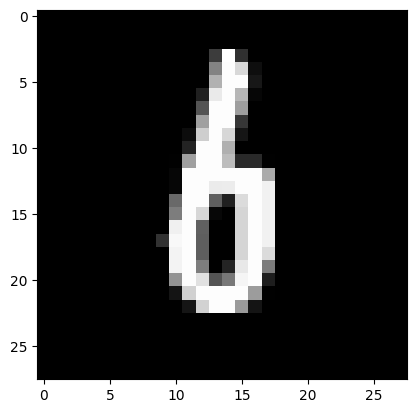

Label: 6.0


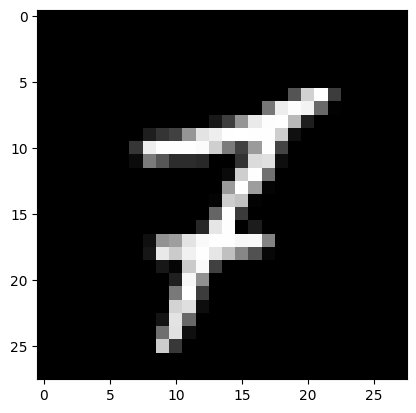

Label: 1.0


In [32]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test))
   